# Viewing Gene Expression Distributions

A great deal of quality-control information comes from the alignment step itself.
Here we are concerned with how the data looks as an ensemble.
Many methods are particularly concerned with the dispersion of genes.

In this notebook we demonstrate the plotting utilities provided by `gsforge` to examine such distributions.

***Set up the notebook***

In [1]:
import itertools
import holoviews as hv
import numpy as np
import xarray as xr
import GSForge as gsf
hv.extension('matplotlib')

import matplotlib.pyplot as plt
import colorcet as cc
from datashader.mpl_ext import dsshow, alpha_colormap
import datashader
from functools import partial
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

***Declare used paths***

In [2]:
# OS-independent path management.
from os import  environ
from pathlib import Path

In [3]:
OSF_PATH = Path(environ.get("GSFORGE_DEMO_DATA", default="~/GSForge_demo_data/")).expanduser().joinpath("osfstorage", "oryza_sativa")
NORMED_GEM_PATH = OSF_PATH.joinpath("AnnotatedGEMs", "oryza_sativa_hisat2_normed.nc")

***Load an AnnotatedGEM***

In [4]:
agem = gsf.AnnotatedGEM(NORMED_GEM_PATH)
agem

<GSForge.AnnotatedGEM>
Name: Oryza sativa
Selected GEM Variable: 'counts'
    Gene   55986
    Sample 475

***View available count arrays***

In [5]:
agem.count_array_names

['counts',
 'TPM_counts',
 'uq_raw_counts',
 'uq_tpm_counts',
 'quantile_counts',
 'tmm_counts']

:AdjointLayout
   :Points   [mean,variance]
   :Area   [variance]   (variance_density)
   :Area   [mean]   (mean_density)
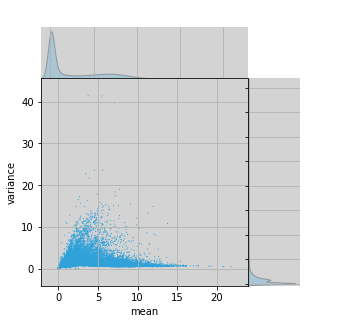

In [7]:
gsf.plots.gem.GenewiseAggregateScatter(
    agem,
    count_variable='counts',
    x_axis_selector='mean',
    y_axis_selector='variance',
    count_transform=lambda c: np.log2(c + 1),
    datashade=False,
    dynspread=False,
)

:AdjointLayout
   :DynamicMap   []
      :RGB   [mean,variance]   (R,G,B,A)
   :Area   [variance]   (variance_density)
   :Area   [mean]   (mean_density)
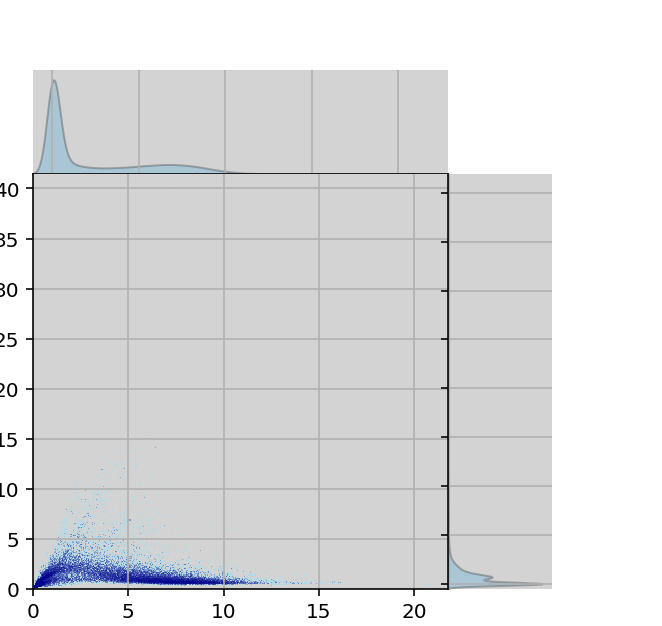

In [6]:
gsf.plots.gem.GenewiseAggregateScatter(
    agem,
    count_variable='counts',
    x_axis_selector='mean',
    y_axis_selector='variance',
    count_transform=lambda c: np.log2(c + 1),
    datashade=True,
    dynspread=True,
)

Recall that all `gsforge` plotting operations allow use of the `Interface` data selection pipeline.

In this case we can select another count array and view the normalized distributions.

In [7]:
gsf.plots.gem.GenewiseAggregateScatter(
    agem,
    count_variable='TPM_counts',
    x_axis_selector='mean',
    y_axis_selector='variance',
    count_transform=lambda c: np.log2(c + 1),
    datashade=True,
    dynspread=True,
)

:AdjointLayout
   :DynamicMap   []
      :RGB   [mean,variance]   (R,G,B,A)
   :Area   [variance]   (variance_density)
   :Area   [mean]   (mean_density)

In [8]:
# for count_var, y_axis in itertools.product(agem.count_array_names, ['variance', 'fano', 'cv_squared']):

#     plot = gsf.plots.gem.GenewiseAggregateScatter(
#         agem,
#         count_variable=count_var,
#         x_axis_selector='mean',
#         y_axis_selector=y_axis,
#         axis_transform=('log 2', lambda ds: np.log2(ds.where(ds > 0))),
#         datashade=True,
#         dynspread=True,
#     )

    # hv.save(plot, f'figures/genewise_aggs/gw_agg_{count_var}_log2_mean_vs_log2_{y_axis}.png', dpi=300, toolbar=None)

For some reason the adjoint png files produced have extra white space.
We can remove that with a solution from [github](https://gist.github.com/thomastweets/c7680e41ed88452d3c63401bb35116ed)

In [9]:
# from PIL import Image
# from PIL import ImageOps

# padding = 5
# padding = np.asarray([-1*padding, -1*padding, padding, padding])

# for figure in Path('figures/genewise_aggs').glob('gw_agg_*.png'):
    
#     image = Image.open(figure)
#     image.load()
#     imageSize = image.size

#     # remove alpha channel
#     invert_im = image.convert("RGB")

#     # invert image (so that white is 0)
#     invert_im = ImageOps.invert(invert_im)
#     imageBox = invert_im.getbbox()
#     imageBox = tuple(np.asarray(imageBox)+padding)

#     cropped = image.crop(imageBox)
#     cropped.save(figure)

## Grouped-Sample Covariance

These plotting functions can take a few minutes to complete.

In [10]:
treatment_labels = agem.data['treatment'].to_series().unique()
treatment_labels

array(['CONTROL', 'HEAT', 'RECOV_HEAT', 'DROUGHT', 'RECOV_DROUGHT'],
      dtype=object)

In [11]:
# %%time
# for group_a, group_b in itertools.combinations(treatment_labels, 2):
#     plot =  gsf.plots.gem.GroupedGeneCovariance(agem, group_variable='treatment', 
#                                                 x_group_label=group_a, y_group_label=group_b,
#                                                 count_transform=lambda c: np.log(c + 0.25)
#                                                ).opts(size=0.75, width=300, height=300)
#     hv.save(plot, f'figures/grouped_covariance/covariance_{group_a}_vs_{group_b}.png', 'png')

## Sample-wise Distributions

These plotting func
tions can take a few minutes to complete.

### Kernel Density Estimates

In [12]:
# %%time
# for count_var, hue in itertools.product(['counts'], [None]):
#     plot = gsf.plots.gem.SamplewiseDistributions(agem, count_variable=count_var, hue_key=hue, 
#                                                  datashade=False)#.opts(width=300, height=300)
#     hv.save(plot, f'figures/kde/samplewise_kde_{count_var}_{hue}.png', toolbar=None)

### Empirical Cumulative Distribution

In [13]:
# %%time
# for count_var, hue in itertools.product(agem.count_array_names[:-1], [None, 'treatment', 'genotype']):
#     plot = gsf.plots.gem.EmpiricalCumulativeDistribution(agem, hue_key=hue, count_variable=count_var, datashade=True)
#     hv.save(plot, f'figures/ecdf/ECDF_{count_var}_{hue}.png', dpi=300, toolbar=None)

In [14]:
plt.style.use('default')
plt.rcParams.update({'font.size': 11, 'font.family': 'serif'})

In [15]:
log_counts, _ = gsf.get_gem_data(agem, count_transform=lambda c: np.log2(c + 1), count_variable='TPM_counts')
data = xr.Dataset({
    "mean": np.mean(log_counts, axis=0),
    "variance": np.sqrt(np.var(log_counts, axis=0)),
})
data = data.set_coords(['mean', 'variance'])
hv.operation.datashader.datashade(
    hv.Points(data, kdims=['mean', 'variance']),
    cmap='inferno', cnorm='log',
).opts(bgcolor='lightgrey', padding=0.05, width=600, height=400, show_grid=True)

:DynamicMap   []
   :RGB   [mean,variance]   (R,G,B,A)

In [16]:
log_counts, _ = gsf.get_gem_data(agem, count_transform=lambda c: np.log2(c + 1))
data = xr.Dataset({
    "mean": np.mean(log_counts, axis=0),
    "variance": np.sqrt(np.var(log_counts, axis=0)),
})
data = data.set_coords(['mean', 'variance'])
hv.operation.datashader.datashade(
    hv.Points(data, kdims=['mean', 'variance']),
    cmap='inferno', cnorm='log',
).opts(bgcolor='lightgrey', padding=0.05, width=600, height=400, show_grid=True)

:DynamicMap   []
   :RGB   [mean,variance]   (R,G,B,A)

In [17]:
log_counts, _ = gsf.get_gem_data(agem, count_transform=lambda c: np.log2(c + 1), count_variable='quantile_counts')
data = xr.Dataset({
    "mean": np.mean(log_counts, axis=0),
    "variance": np.sqrt(np.var(log_counts, axis=0)),
})
data = data.set_coords(['mean', 'variance'])
hv.operation.datashader.datashade(
    hv.Points(data, kdims=['mean', 'variance']),
    cmap='inferno', cnorm='log',
).opts(bgcolor='lightgrey', padding=0.05, width=600, height=400, show_grid=True)

/home/tyler/anaconda3/envs/gsfenv/lib/python3.7/site-packages/xarray/core/computation.py:742: RuntimeWarning: invalid value encountered in log2
  result_data = func(*input_data)


:DynamicMap   []
   :RGB   [mean,variance]   (R,G,B,A)

In [13]:
textwidth = 17.16637
textwidth / 3 *0.393701

2.252805678456667

In [9]:
4*0.393701

1.574804

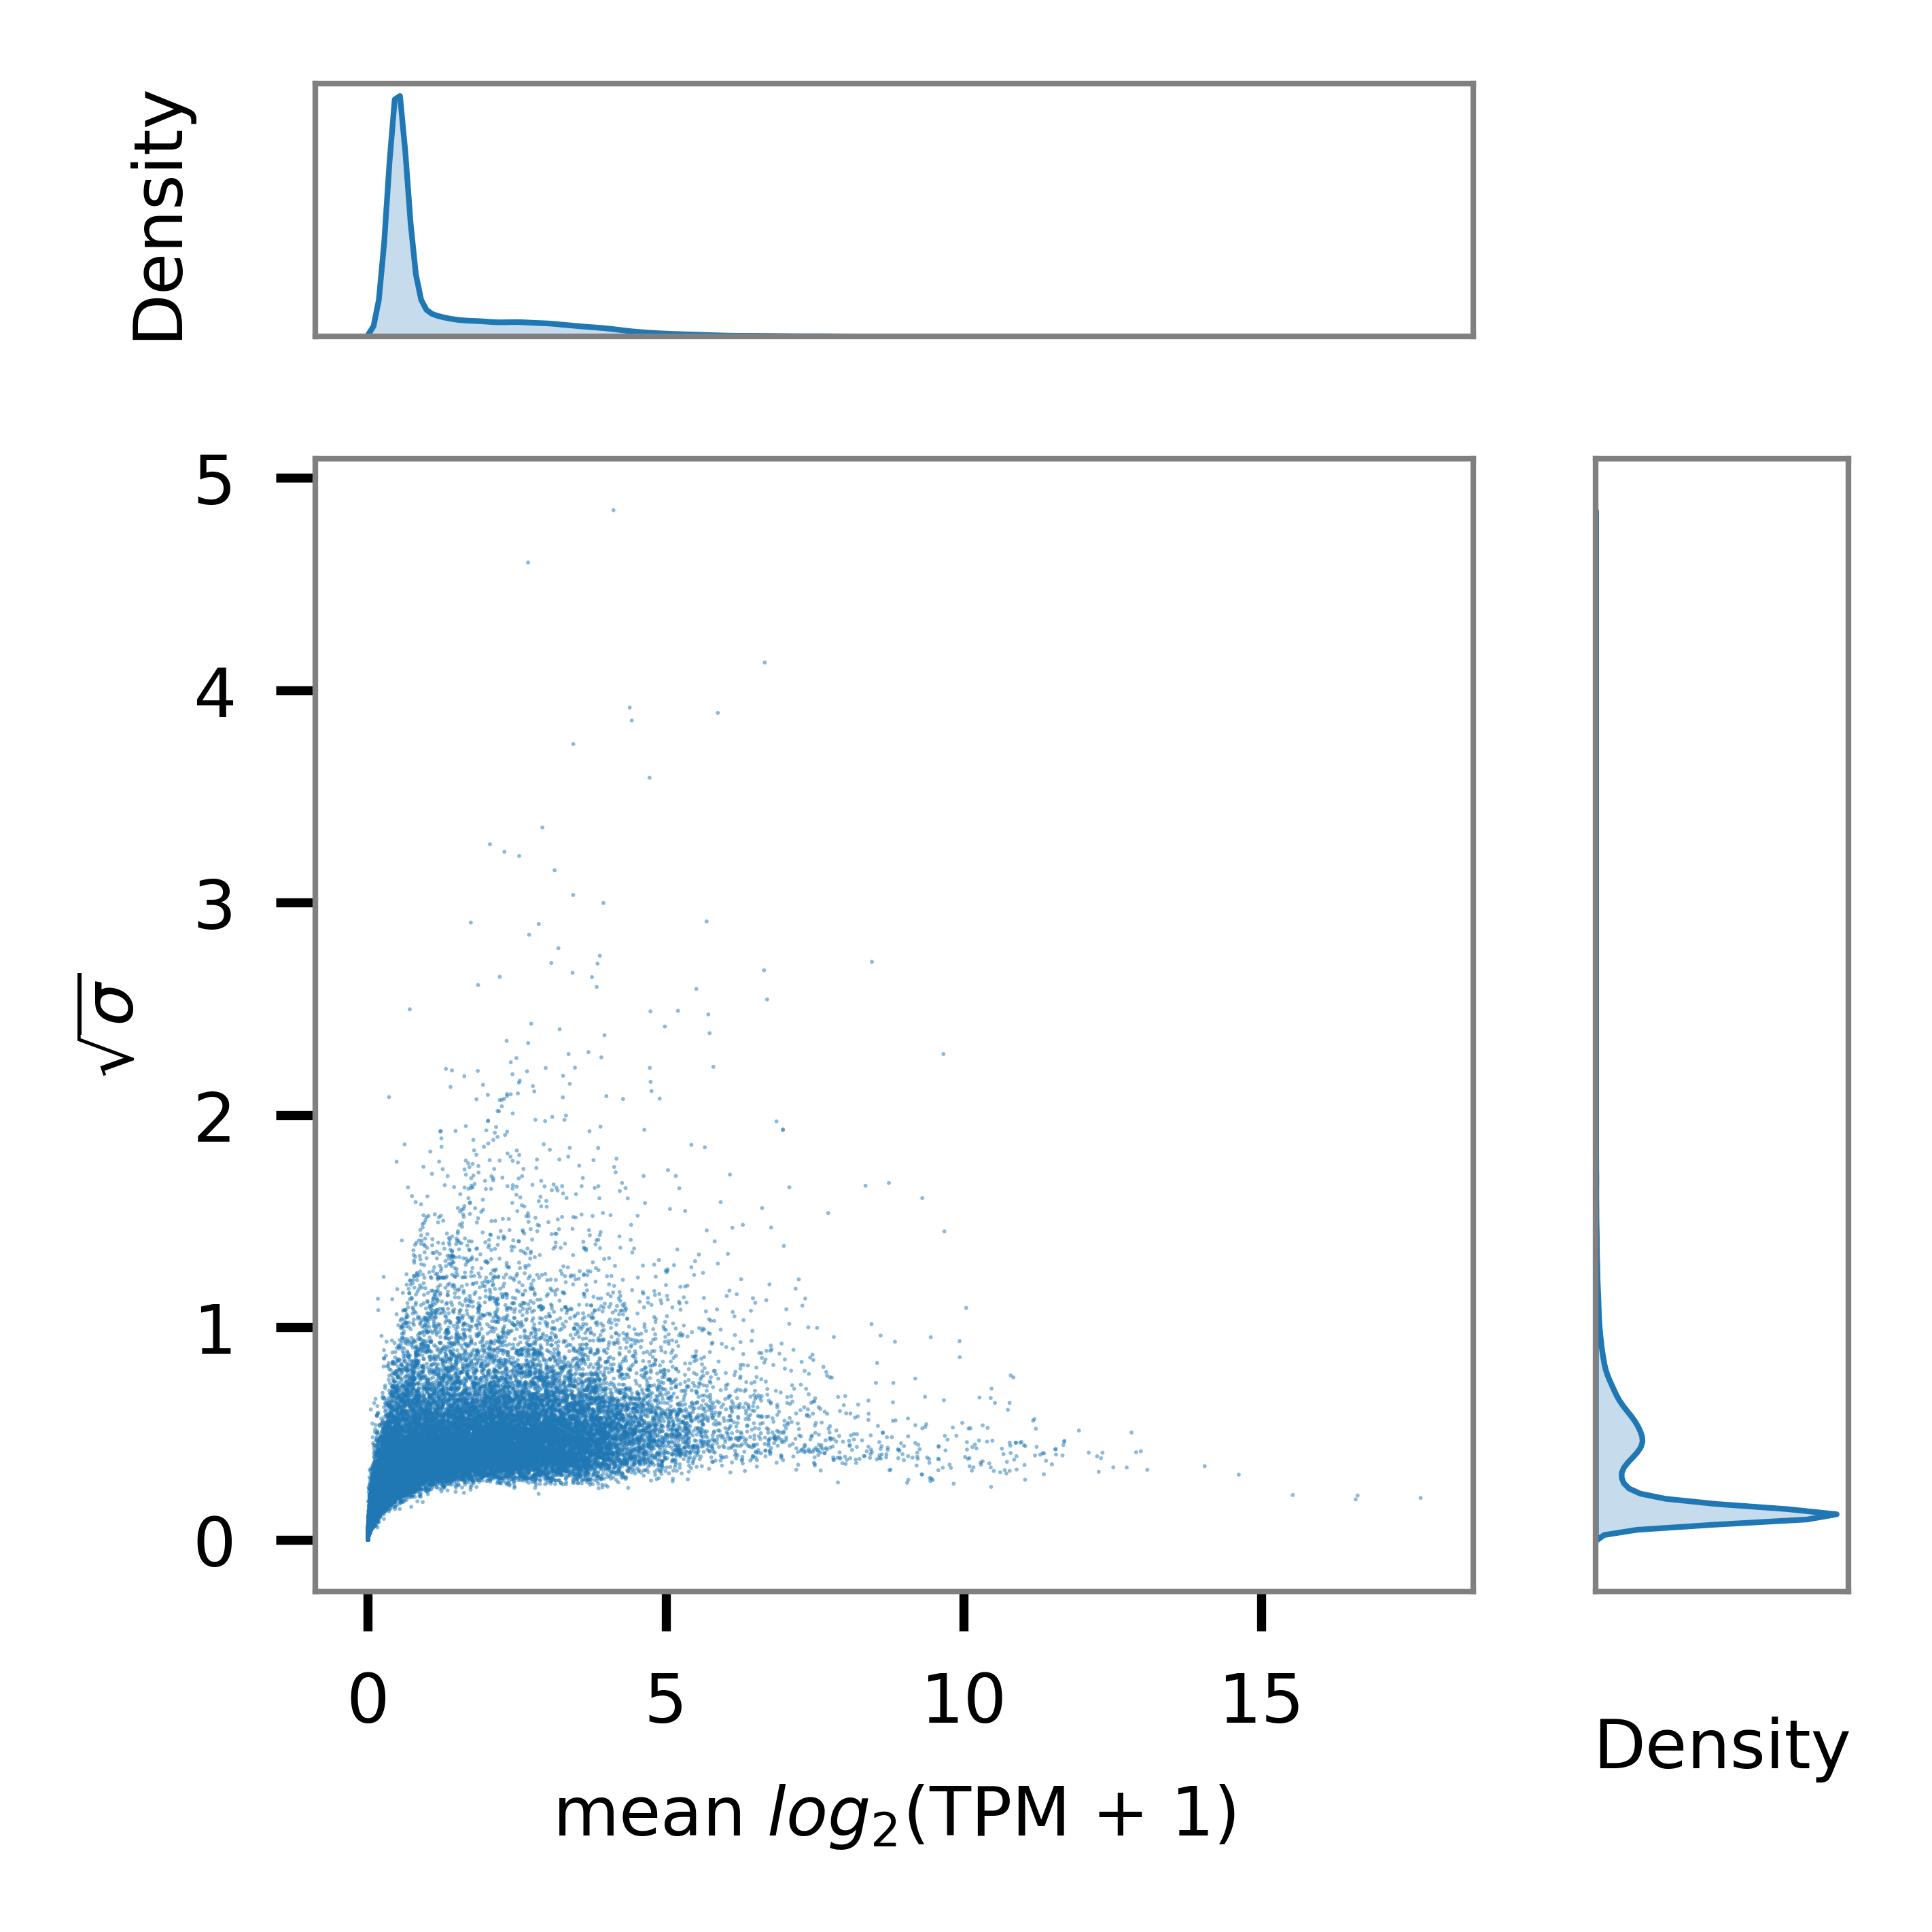

In [16]:
log_counts, _ = gsf.get_gem_data(agem, count_transform=lambda c: np.log2(c + 1), 
                                 count_variable='TPM_counts')
data = xr.Dataset({
    "mean log2 counts": np.mean(log_counts, axis=0),
    "sqrt log2 variance": np.sqrt(np.var(log_counts, axis=0)),
})

data = data.set_coords(['mean log2 counts', 'sqrt log2 variance'])
x_min = data['mean log2 counts'].values.min()
x_max = data['mean log2 counts'].values.max()

y_min = data['sqrt log2 variance'].values.min()
y_max = data['sqrt log2 variance'].values.max()

padding = 0.05
x_pad = (x_max - x_min) * padding
y_pad = (y_max - y_min) * padding

x_min -= x_pad
# x_max += x_pad
x_max = 11.5

y_min -= y_pad
# y_max += y_pad
y_max = 2

plt.rcParams.update({'font.size': 6})

# page_width = 11
# margin_width = 1
# text_width = page_width - 2 * margin_width
axis_width = 2.25

# fig_inches = 1.55

fig_dpi = 1200
fig_pixels = int(fig_inches * fig_dpi)

fig, axScatter = plt.subplots(figsize=(axis_width, axis_width), constrained_layout=True, dpi=fig_dpi)

axScatter.scatter(
    data['mean log2 counts'].values,
    data['sqrt log2 variance'].values,
    s=0.5,
    alpha=0.5, 
    marker='.', 
    edgecolors='none', 
)


divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 0.2*fig_inches, pad=0.15)
axHisty = divider.append_axes("right", 0.2*fig_inches, pad=0.15)


axHistx.xaxis.set_tick_params(labelbottom=False, bottom=False)
axHistx.set_yticklabels([])
axHistx.yaxis.set_tick_params(left=False)

for spine in axHistx.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)
    
    
axHisty.yaxis.set_tick_params(labelleft=False, left=False)
axHisty.set_xticklabels([])
axHisty.xaxis.set_tick_params(left=False)

for spine in axHisty.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)
    
for spine in axScatter.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)


# axHistx.set_xlim(x_min, x_max)
# axHisty.set_ylim(y_min, y_max)

sns.kdeplot(data["mean log2 counts"].values, ax=axHistx, linewidth=0.5, shade=True, bw_adjust=1.0)
sns.kdeplot(y=data["sqrt log2 variance"].values, ax=axHisty, linewidth=0.5, shade=True, bw_adjust=1.0)

axScatter.set(xlabel='mean $log_2$(TPM + 1)', ylabel='$\sqrt{\sigma}$');
plt.savefig('figures/log2mean_v_var_tpm.png')

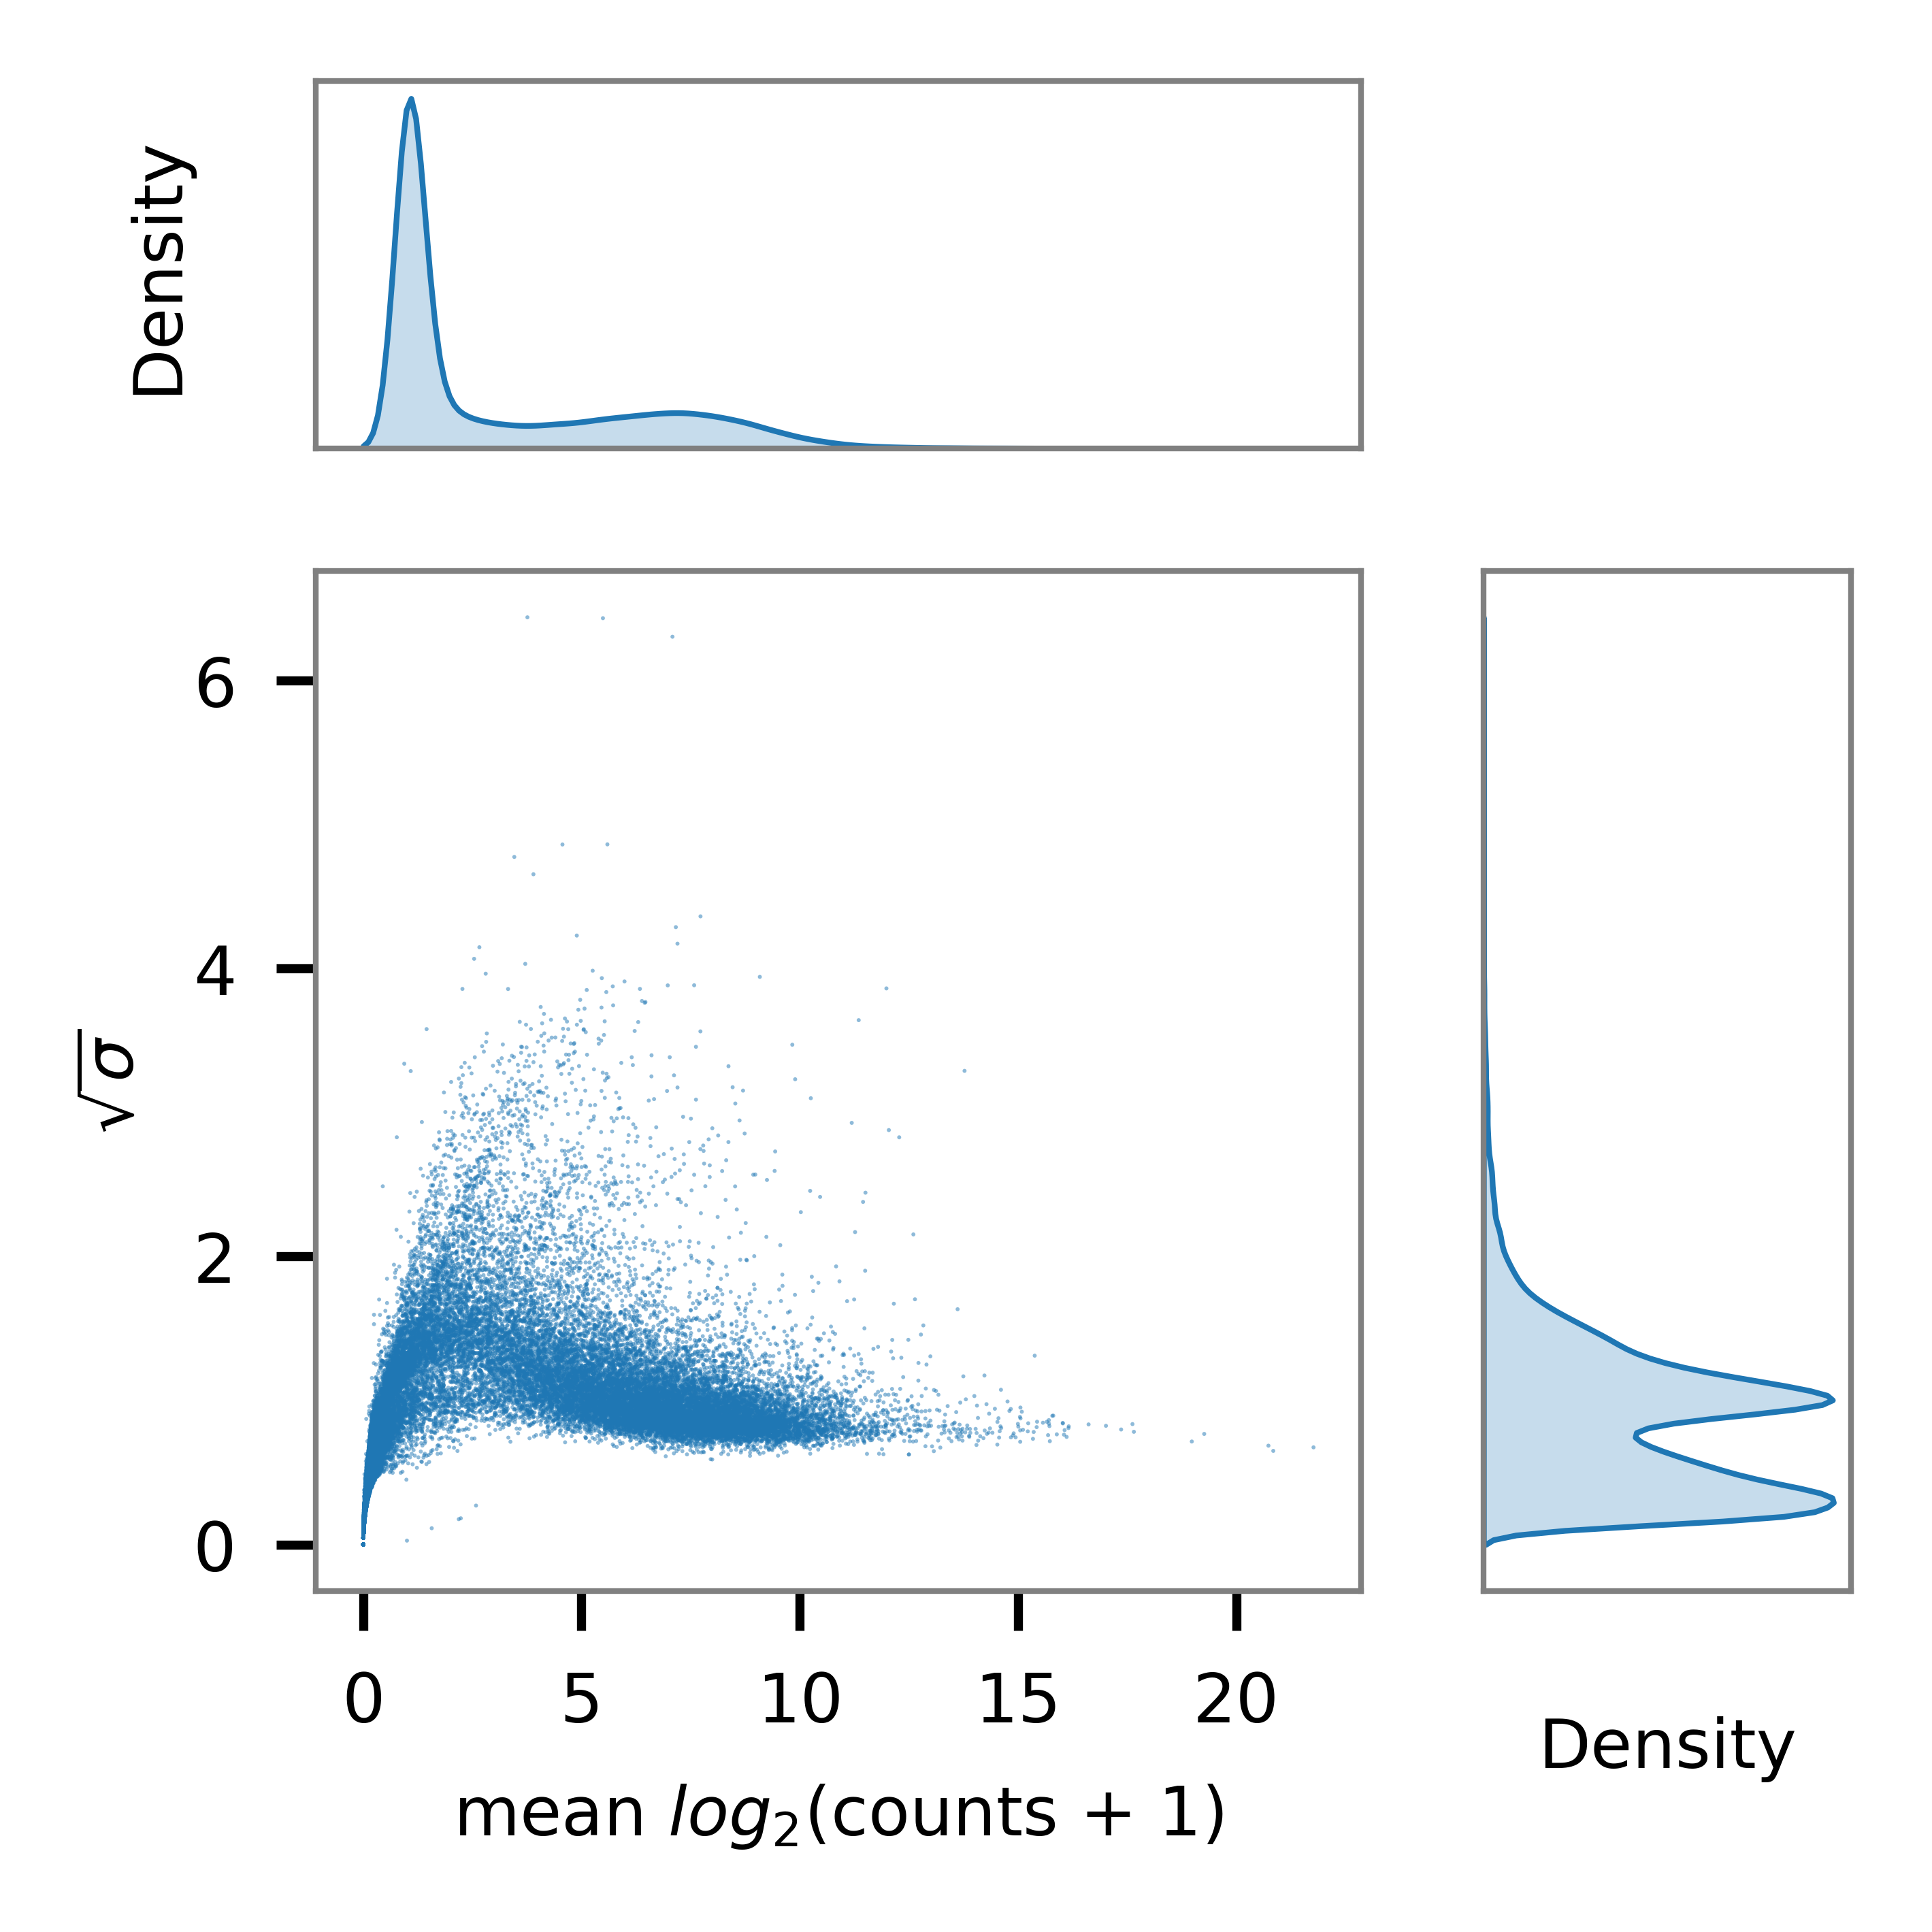

In [18]:
log_counts, _ = gsf.get_gem_data(agem, count_transform=lambda c: np.log2(c + 1))
data = xr.Dataset({
    "mean log2 counts": np.mean(log_counts, axis=0),
    "sqrt log2 variance": np.sqrt(np.var(log_counts, axis=0)),
})

data = data.set_coords(['mean log2 counts', 'sqrt log2 variance'])
x_min = data['mean log2 counts'].values.min()
x_max = data['mean log2 counts'].values.max()

y_min = data['sqrt log2 variance'].values.min()
y_max = data['sqrt log2 variance'].values.max()

padding = 0.05
x_pad = (x_max - x_min) * padding
y_pad = (y_max - y_min) * padding

x_min -= x_pad
# x_max += x_pad
x_max = 11.5

y_min -= y_pad
# y_max += y_pad
y_max = 2

plt.rcParams.update({'font.size': 6})

# page_width = 11
# margin_width = 1
# text_width = page_width - 2 * margin_width
# axis_width = text_width / 4 

fig_inches = 2.25
axis_width = 2.25

fig_dpi = 1200
fig_pixels = int(fig_inches * fig_dpi)

fig, axScatter = plt.subplots(figsize=(fig_inches, fig_inches), constrained_layout=True, dpi=fig_dpi)

axScatter.scatter(
    data['mean log2 counts'].values,
    data['sqrt log2 variance'].values,
    s=0.5,
    alpha=0.5, 
    marker='.', 
    edgecolors='none', 
)

divider = make_axes_locatable(axScatter)
axHistx = divider.append_axes("top", 0.2*fig_inches, pad=0.15)
axHisty = divider.append_axes("right", 0.2*fig_inches, pad=0.15)



axHistx.xaxis.set_tick_params(labelbottom=False, bottom=False)
axHistx.set_yticklabels([])
axHistx.yaxis.set_tick_params(left=False)

for spine in axHistx.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)
    
    
axHisty.yaxis.set_tick_params(labelleft=False, left=False)
axHisty.set_xticklabels([])
axHisty.xaxis.set_tick_params(left=False)

for spine in axHisty.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)
    
for spine in axScatter.spines.values():
    spine.set_edgecolor('grey')
    spine.set_linewidth(0.5)


sns.kdeplot(data["mean log2 counts"].values, ax=axHistx, linewidth=0.5, shade=True, bw_adjust=1)
sns.kdeplot(y=data["sqrt log2 variance"].values, ax=axHisty, linewidth=0.5, shade=True, bw_adjust=1)

axScatter.set(xlabel='mean $log_2$(counts + 1)', ylabel='$\sqrt{\sigma}$');
plt.savefig('figures/log2mean_v_var_raw.png')